**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sm
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize, root

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In order to verify that the optimal labor supply is given as $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, we will set up a lagrange function.

$$\mathcal{L}(L, C, \lambda) = \ln(C^\alpha G^{1-\alpha}) - \nu\frac{L^2}{2} + \lambda\left(\kappa + (1-\tau)wL - C\right)$$
$$\mathcal{L}(L, C, \lambda) = \alpha\ln(C)+ (1-\alpha)\ln(G) - \nu\frac{L^2}{2} + \lambda\left(\kappa + (1-\tau)wL - C\right)$$

Inserting the constraing we get
$$\mathcal{L}(L, C, \lambda) = \alpha\ln(\kappa + (1-\tau)wL) + (1-\alpha)\ln(G) - \nu\frac{L^2}{2} + \lambda\left(\kappa + (1-\tau)wL - (\kappa + (1-\tau)wL)\right)$$
Simplifying
$$\mathcal{L}(L, C, \lambda) = \alpha\ln(\kappa + (1-\tau)wL) + (1-\alpha)\ln(G) - \nu\frac{L^2}{2}$$
We now take the partial derivatives with respect to L as C has been substituted
$$\frac{\partial \mathcal{L}}{\partial L} = 0 = \frac{\alpha(1-\tau)w}{\kappa + (1-\tau)wL}-\nu L$$
$$\frac{\alpha(1-\tau)w}{\kappa + (1-\tau)wL} = \nu L$$
$$\alpha(1-\tau)w = \kappa\nu L +(1-\tau)w L^2 $$
$$\alpha(1-\tau)w = \kappa\nu L +(1-\tau)w L^2 $$
$$(1-\tau)w L^2 + \kappa\nu L - alpha(1-\tau)w = 0$$
Dividing by $w$ we get
$$(1-\tau) L^2 + \frac{\kappa}{w} L - \frac{\alpha(1-\tau)}{\nu} = 0$$
From the above it is evident that L is a quadratic equation where the solution is know to $L = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$. 

We instert and find:
$$L = \frac{-\frac{\kappa}{w} \pm \sqrt{(\frac{\kappa}{w})^2 + 4(1-\tau)\frac{\alpha(1-\tau)}{\nu}}}{2(1-\tau)}$$
Rearranging and multiplying with $w$ and utilizing that $\tilde{w}=(1-\tau)w$ we get
$$L = \frac{-{\kappa} \pm \sqrt{(\kappa)^2 + 4(1-\tau)w\frac{\alpha(1-\tau)w}{\nu}}}{2 \tilde{w}}$$
$$L = \frac{-{\kappa} \pm \sqrt{\kappa^2 + 4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$$

Since labor is $L\in[0,24]$ we must get:
$$L = \frac{-{\kappa} + \sqrt{\kappa^2 + 4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$$

It is worth mentioning that $G$ (Government consumption) does not directly influence the optimal choice of labor $L$, but it does affect the overall utility.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

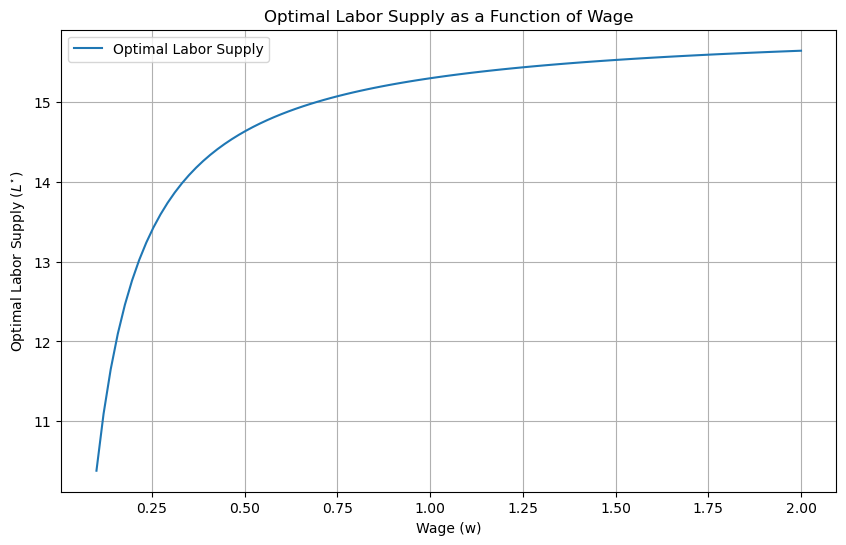

In [2]:
# Defining the given parameters
alpha = 0.5
kappa = 1.0
nu = 1/(2*16**2)
w = 1.0
tau = 0.3

# Defining the function for optimal labor supply
def L_star(tilde_w, kappa=kappa, alpha=alpha, nu=nu):
    return (-kappa + np.sqrt(kappa**2 + 4 * (alpha/nu) * tilde_w**2)) / (2*tilde_w)

# Creating an array of wage values
w_values = np.linspace(0.1, 2, 100) # We start from 0.1 to avoid division by zero in L_star

# Now we calculate the corresponding labor supply
L_star_values = L_star((1-tau)*w_values)

# And create the plot
plt.figure(figsize=(10,6))
plt.plot(w_values, L_star_values, label='Optimal Labor Supply')
plt.xlabel('Wage (w)')
plt.ylabel('Optimal Labor Supply ($L^{\star}$)')
plt.title('Optimal Labor Supply as a Function of Wage')
plt.legend()
plt.grid(True)
plt.show()


This plot yields the visual representation of how the optimal labor supply changes as the wage changes, given the other parameters.

The graph is upward sloping, indicating that the worker chooses to work more as the wage rate increases. The diminishing slope of the curve reflects the decreasing marginal benefit of additional wages on labor supply.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [3]:
# Define the function for optimal labor supply
def optimal_labor(w_tilde, alpha, nu, kappa):
    L_star = (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * w_tilde**2)) / (2 * w_tilde)
    return L_star

# We define the utility function
def utility(C, G, alpha, L, nu):
    return np.log(C**alpha * G**(1-alpha)) - nu * L**2 / 2

# Create an array of tau values
tau_values = np.linspace(0.0, 1.0, 100)

# Then we initialize arrays for L_star, G, and utility
L_star_values = np.empty_like(tau_values)
G_values = np.empty_like(tau_values)
utility_values = np.empty_like(tau_values)

# And compute L_star, G, and utility for each tau
for i, tau in enumerate(tau_values):
    w_tilde = (1 - tau) * w
    L_star = optimal_labor(w_tilde, alpha, nu, kappa)
    G = tau * w * L_star
    C = kappa + w_tilde * L_star
    u = utility(C, G, alpha, L_star, nu)
    L_star_values[i] = L_star
    G_values[i] = G
    utility_values[i] = u


/var/folders/cb/1p5mybls2234c7mbdg7hy8vr0000gn/T/ipykernel_69241/2814832288.py:8: RuntimeWarning: divide by zero encountered in log
  return np.log(C**alpha * G**(1-alpha)) - nu * L**2 / 2
/var/folders/cb/1p5mybls2234c7mbdg7hy8vr0000gn/T/ipykernel_69241/2814832288.py:3: RuntimeWarning: invalid value encountered in double_scalars
  L_star = (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * w_tilde**2)) / (2 * w_tilde)


We can now plot these values

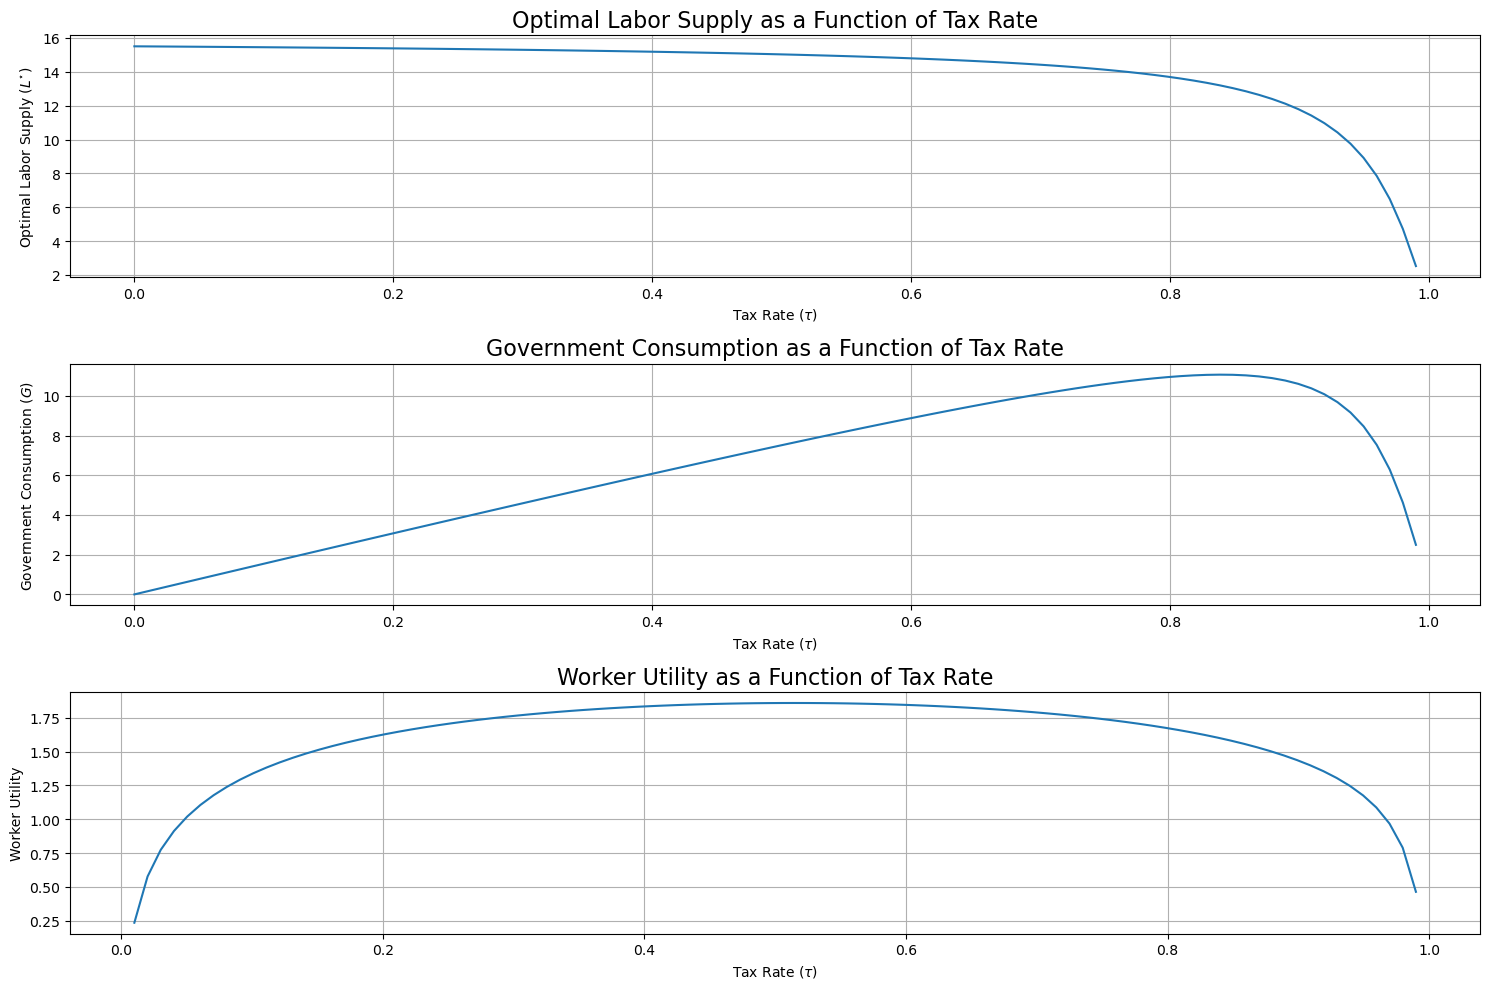

In [4]:
plt.figure(figsize=(15, 10))

# Plotting L_star
plt.subplot(3, 1, 1)
plt.plot(tau_values, L_star_values)
plt.xlabel('Tax Rate ($\\tau$)', fontsize=10)
plt.ylabel('Optimal Labor Supply ($L^{\star}$)', fontsize=10)
plt.title('Optimal Labor Supply as a Function of Tax Rate', fontsize=16)
plt.grid(True)

# Plotting G
plt.subplot(3, 1, 2)
plt.plot(tau_values, G_values)
plt.xlabel('Tax Rate ($\\tau$)', fontsize=10)
plt.ylabel('Government Consumption ($G$)', fontsize=10)
plt.title('Government Consumption as a Function of Tax Rate', fontsize=16)
plt.grid(True)

# Plotting utility
plt.subplot(3, 1, 3)
plt.plot(tau_values, utility_values)
plt.xlabel('Tax Rate ($\\tau$)', fontsize=10)
plt.ylabel('Worker Utility', fontsize=10)
plt.title('Worker Utility as a Function of Tax Rate', fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

To find the socially optimal tax rate $\tau^\star$ that maximizes worker utility, we need to solve the maximization problem:

$$\tau^\star = \arg\max_{\tau\in(0,1)} V(w, \tau, G(\tau))$$

where $V(w, \tau, G)$ represents the worker's utility function.


In [5]:
# Given parameters
alpha = 0.5
kappa = 1.0
nu = 1/(2*16**2)
w = 1.0

# Defining function for optimal labor supply
def L_star(tilde_w, kappa=kappa, alpha=alpha, nu=nu):
    return (-kappa + np.sqrt(kappa**2 + 4 * (alpha/nu) * tilde_w**2)) / (2*tilde_w)

# Defining function for government consumption
def G_func(tau, w):
    tilde_w = (1 - tau) * w
    return tau * w * L_star(tilde_w)

# Defining function for worker utility
def utility(tau, w):
    tilde_w = (1 - tau) * w
    L = L_star(tilde_w)
    C = kappa + (1 - tau) * w * L
    return np.log(C**alpha * G_func(tau, w)**(1 - alpha)) - nu * (L**2) / 2

# Defining function for negative utility to minimize
def neg_utility(tau, w):
    return -utility(tau, w)

# We define the objective function to minimize
obj_func = lambda tau: neg_utility(tau, w)

# And find the optimal tax rate
result = minimize_scalar(obj_func, bounds=(0, 1), method='bounded')

optimal_tau = result.x
max_utility = -result.fun

print(f"Optimal tax rate (tau): {optimal_tau}")
print(f"Maximum utility: {max_utility}")


Optimal tax rate (tau): 0.5145311213913639
Maximum utility: 1.8591992509323028


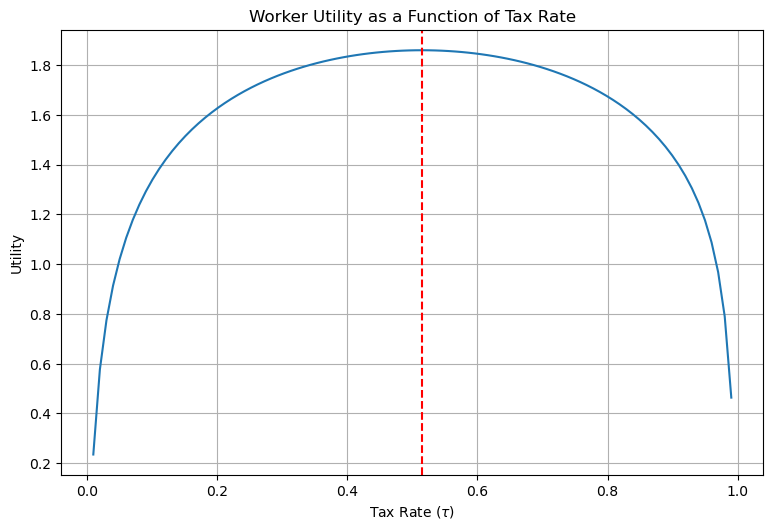

In [6]:
# Plotting Worker utility
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 3)
plt.plot(tau_values, utility_values)
plt.axvline(x=optimal_tau, color='r', linestyle='--', label='Optimal Tax Rate')
plt.xlabel('Tax Rate ($\\tau$)')
plt.ylabel('Utility')
plt.title('Worker Utility as a Function of Tax Rate')
plt.grid(True)

plt.tight_layout()
plt.show()

This plot visualizes how worker utility changes with the tax rate, and it highlights the optimal tax rate that maximizes utility. The vertical red dashed line represents the optimal tax rate. From the visualization, it is clear that the tax rate of 51.45% yields the maximum tax utility. The maximum utility with this tax rate is 1.86. 

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

To find the government consumption $G$ that satisfies $G = \tau w L^{\star}((1-\tau)w,G)$, we first need to solve the worker's problem given values for $G$ and $\tau$. We can do this by writing a function to compute the optimal labor supply for given $G$ and $\tau$.

To solve for $L^{\star}$, we'll need to maximize the utility function with respect to $L$. We can do this similar to how we found the optimal $\tau$.

In [7]:
# Defining the utility function
def utility(L, w, tau, G, alpha, kappa, sigma, rho, nu, epsilon):
    C = kappa + (1 - tau) * w * L
    term = (alpha * C**((sigma - 1) / sigma) + (1 - alpha) * G**((sigma - 1) / sigma))**(sigma / (sigma - 1))
    return ((term**(1 - rho) - 1) / (1 - rho)) - nu * L**(1 + epsilon) / (1 + epsilon)

# Defining a function to solve the worker's problem
def solve_worker_problem(w, tau, G, alpha, kappa, sigma, rho, nu, epsilon):
    negative_utility = lambda L: -utility(L, w, tau, G, alpha, kappa, sigma, rho, nu, epsilon)
    result = minimize(negative_utility, 1.0, bounds=[(0.0, 24.0)])  # Initial guess L=1.0
    return result.x[0]  # Return the optimal L

# Defining a function for the equation G - tau * w * L_star
def equation(G, w, tau, alpha, kappa, sigma, rho, nu, epsilon):
    L_star = solve_worker_problem(w, tau, G, alpha, kappa, sigma, rho, nu, epsilon)
    return G - tau * w * L_star

# And the parameters
w = 1.0
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
tau_optimal = 0.5145  # The optimal tau found in Question 4

# Now also with the parameters for set 1 and set 2
parameters_set1 = {"sigma": 1.001, "rho": 1.001, "epsilon": 1.0}
parameters_set2 = {"sigma": 1.5, "rho": 1.5, "epsilon": 1.0}

# Solving for G for each set of parameters
for i, parameters in enumerate([parameters_set1, parameters_set2], start=1):
    G_result = root(equation, 1.0, args=(w, tau_optimal, alpha, kappa, parameters["sigma"], parameters["rho"], nu, parameters["epsilon"]))
    print(f"Set {i}: The value of G that solves the equation is {G_result.x[0]}")



Set 1: The value of G that solves the equation is 0.9998587241017639
Set 2: The value of G that solves the equation is 4.9749270933766985


For Set 1 parameters ($\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$), the equilibrium level of government consumption is approximately 1. For Set 2 parameters ($\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0$), the equilibrium level of government consumption is approximately 4.97.

These values of G ensure that the government's budget constraint is satisfied while the worker is maximizing their utility, given the parameters of the model and the chosen tax rate.

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

We can use a similar apporach as we did in Question 4. However, now we need to take into account that $G$ also depends on $\tau$ when we calculate the worker's utility. Thus, we need to solve for $G$ for each $\tau$ during the optimization process.

In [8]:
# Defining a function for the negative utility, taking into account that G depends on tau
def negative_utility_tau(tau, w, alpha, kappa, sigma, rho, nu, epsilon):
    # Solve for G
    G_result = root(equation, 1.0, args=(w, tau, alpha, kappa, sigma, rho, nu, epsilon))
    G = G_result.x[0]
    # Calculate optimal L
    L_star = solve_worker_problem(w, tau, G, alpha, kappa, sigma, rho, nu, epsilon)
    # Return negative utility
    return -utility(L_star, w, tau, G, alpha, kappa, sigma, rho, nu, epsilon)

# Solving for tau_star for each set of parameters
for i, parameters in enumerate([parameters_set1, parameters_set2], start=1):
    result = minimize(negative_utility_tau, 0.5, args=(w, alpha, kappa, parameters["sigma"], parameters["rho"], nu, parameters["epsilon"]), bounds=[(0.0, 1.0)])
    print(f"Set {i}: The socially optimal tax rate is {result.x[0]}")


/var/folders/cb/1p5mybls2234c7mbdg7hy8vr0000gn/T/ipykernel_69241/3888548005.py:4: RuntimeWarning: invalid value encountered in power
  term = (alpha * C**((sigma - 1) / sigma) + (1 - alpha) * G**((sigma - 1) / sigma))**(sigma / (sigma - 1))


Set 1: The socially optimal tax rate is 0.5000034025906599
Set 2: The socially optimal tax rate is 0.5


/var/folders/cb/1p5mybls2234c7mbdg7hy8vr0000gn/T/ipykernel_69241/3888548005.py:4: RuntimeWarning: invalid value encountered in double_scalars
  term = (alpha * C**((sigma - 1) / sigma) + (1 - alpha) * G**((sigma - 1) / sigma))**(sigma / (sigma - 1))


This finds the tax rate $\tau$ that maximizes the worker's utility, while keeping the government's budget constraint satisfied, for each set of parameters.

For each $\tau$, we first solve for the corresponding $G$ that satisfies the government's budget constraint, and then we calculate the worker's utility.

The tax rate in set 1 is approximately 50% and in set 2 it is 45.89%. Both being lower than the optimal tax rate found in question 4.

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In order to numerically veryfy that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximizes profits we will start by defining funcitons to calculate the profits. There after we will by using different values of kappa, (1.0, 1.25, 1.5, 1.75, 2.0) see nummerically that we have the function that maximizes profits.

Kappa = 1.0
Optimal Hairdressers: 0.25
Optimal Profits: 0.25
Profits for different hairdresser values: [0.21622776601683794, 0.24721359549995792, 0.24772255750516609, 0.23245553203367586, 0.20710678118654757, 0.17459666924148343, 0.1366600265340756, 0.09442719099991581, 0.048683298050513746, 0.0, -0.05119115182984846, -0.1045548849896678, -0.159824574900862, -0.21678404338007673, -0.27525512860841106, -0.3350889359326483, -0.3961595189594702, -0.4583592135001262, -0.5215951247909778, -0.5857864376269049]

Kappa = 1.25
Optimal Hairdressers: 0.390625
Optimal Profits: 0.390625
Profits for different hairdresser values: [0.2952847075210474, 0.35901699437494744, 0.38465319688145755, 0.39056941504209486, 0.38388347648318444, 0.3682458365518543, 0.3458250331675945, 0.31803398874989486, 0.28585412256314224, 0.25, 0.21101106021268956, 0.16930639376291512, 0.12521928137392258, 0.07901994577490412, 0.030931089239486287, -0.018861169915810327, -0.07019939869933789, -0.12294901687515769, -0.17699390

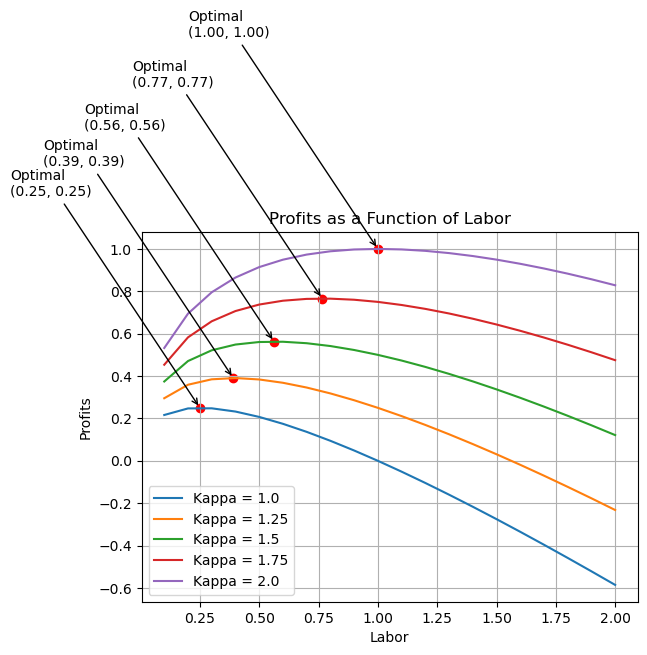

In [20]:
# We start by defining af function that calculates the profits based on the amount of employed hairdressers.
def profits(kappa, labor, eta=0.5, wage=1.0):
    profits = kappa * (labor ** (1 - eta)) - wage * labor
    return profits

# We then define a function which calculates the optimal amount of employed hairdressers
def employed_hairdressers(kappa, eta=0.5, wage=1.0):
    optimal_labor = ((1 - eta) * kappa / wage) ** (1/eta)
    return optimal_labor

# We now create a list of kappa values with the purpose of testing that the function actually maximizes profits
kappa_values = [1.0, 1.25, 1.5, 1.75, 2.0]

# To highlight that the function actually maximizes profits we create a figure and axes for the plot.
fig, ax = plt.subplots()

# We now create a loop that itirates over the kappa_values list that we created above to finde the optimale amount of employed hairdressers.
for kappa in kappa_values:
    # We find the optimal number of hairdressers for a given kappa with the following.
    optimal_labor = employed_hairdressers(kappa)
    # We find the profits for the optimal amount of hairdressers with the following.
    optimal_profits = profits(kappa, optimal_labor)
    
    # Calculate profits for a range of hairdresser values to test numerically that we have an optimum 
    hairdressers_range = [hairdressers / 10 for hairdressers in range(1, 21)]
    profits_test = [profits(kappa, hairdressers) for hairdressers in hairdressers_range]

    # We now calculate the profits for a different amount of employed hairdresser to numerically test  that we have an optimal amount of employed hairdressers. 
    labor_range = [labor / 10 for labor in range(1, 21)]
    profits_test = [profits(kappa, labor) for labor in labor_range]
    print("Kappa =", kappa)
    print("Optimal Hairdressers:", optimal_labor)
    print("Optimal Profits:", optimal_profits)
    print("Profits for different hairdresser values:", profits_test)
    print()
    # We now plot the profits for the hair salon based on the amount of employed hairdressers.
    ax.plot(labor_range, profits_test, label=f'Kappa = {kappa}')
    ax.scatter(optimal_labor, optimal_profits, color='red')
    ax.annotate(f'Optimal\n({optimal_labor:.2f}, {optimal_profits:.2f})',
                xy=(optimal_labor, optimal_profits),
                xytext=(optimal_labor - 0.8, optimal_profits + 1),
                arrowprops=dict(arrowstyle='->', color='black'))
    
# We make a plot with labels and a title
ax.set_xlabel('Labor')
ax.set_ylabel('Profits')
ax.set_title('Profits as a Function of Labor')
plt.grid(True)

# We ad a legend to enhance the readability of the plot. 
ax.legend()

# We show the plot
plt.show()

From the code above it is evident both nummerically and graphycally that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximizes profits for the chosen $\kappa$'s. The plot supports the numerical analysis and shows that the function indeed is the amount of labor supplied that maximizes profits

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

The value of the salon is now the expectation of the discounted value of profits. In order to calculate the ex ante value H we will simulate the future demand shocks the salon will experience and calculate the profit streams for the next 120 months.

In [10]:
 # We start by defining the parameter values that we have been given in the exam. 
rho = 0.90
administration_cost = 0.01
sigma_epsilon = 0.10
R = math.pow(1 + 0.01, 1/12)
T = 120
w = 1.0
eta = 0.5

# We choose the number time the simulation should run. We choose a high to optain a more reliable answer. 
K = 10000

# We use our seed value defined above as our random number through out the exam. 
np.random.seed(2023)


# We initialize the cumulative sum of H and initial labor and demand shock. This our starting point for the following calculations. 
H_sum = 0
labor_prev = 0
kappa_t_prev = 1  # Initial value for demand shock in period 0

# We run a series of demand shocks over time. 
epsilon_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K-1, T))

# We iterate over a number of series about to be run. 
for k in range(K-1):
    # For each series the sum of h is starting at 0.
    h_sum = 0

    # All of the series below will run through the planning horizon given below.
    for t in range(T):
        # This series calculate the demand shock
        kappa_t = math.exp(rho * math.log(kappa_t_prev) + epsilon_series[k, t])

        # This series calculates the labor level
        labor_t = ((1 - eta) * kappa_t / w)**(1 / eta)

        # This series will calculate the profit for the current period
        h_t = R**(-t) * (kappa_t * labor_t**(1 - eta) - w * labor_t - int(labor_t != labor_prev) * administration_cost)

        # After the series have been run we have to update the cumulative sum of h for the current series
        h_sum += h_t

        # We also have to update the previous labor and demand shock for the next iteration
        labor_prev = labor_t
        kappa_t_prev = kappa_t

    # At last we update cumulative sum of H all series. 
    H_sum += h_sum

# Estimate H
H = H_sum / K

print("Estimated value of H:", H)

Estimated value of H: 27.621677495987353


The discounted value following the policy gives with the current seed a value of 27.6.

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

With the updated policy the loop needs to be changed so that after each period the salon will consider if they need to lay of labor or hire labor for the next period if and only if the the change in labor is greater than 0.05.


In [11]:
# We start by setting $\delta$ as given by the policy above. 
delta = 0.05


# We initialize the cumulative sum of H and initial labor and demand shock again. 
H_sum = 0
labor_prev = 0
kappa_t_prev = 1  # Initial demand shock


# We iterate over a number of series about to be run.
for k in range(K-1):
    # For each series the sum of h is starting at 0.
    h_sum = 0

     # All of the series below will run through the planning horizon given below. It differs from 2.2 since the labor level is based on the $\delta$ level
    for t in range(T):
        # It calculates the demand shock.
        kappa_t = math.exp(rho * math.log(kappa_t_prev) + epsilon_series[k, t])

        # It calculates the labor level
        labor_t = ((1 - eta) * kappa_t / w)**(1 / eta)

        # Calculates the labor level based on the new policy with delta = 0.05
        labor_t_policy = (kappa_t * (1 - eta) / w)**(1 / eta)

        # At last we check if labor level should be adjusted based on the policy
        if abs(labor_prev - labor_t_policy) > delta:
            labor_t = labor_t_policy
        else:
            labor_t = labor_prev

        # We then calculate the profit for the current period with the new policy. 
        h_t = R**(-t) * (kappa_t * labor_t**(1 - eta) - w * labor_t - int(labor_t != labor_prev) * administration_cost)

        # We update the cumulative sum of h for the current series. 
        h_sum += h_t

        # We also have to update the previous labor and demand shock for the next iteration
        labor_prev = labor_t
        kappa_t_prev = kappa_t

    # At last we update cumulative sum of H all series.
    H_sum += h_sum

# We estimate H
H = H_sum / K

print("Estimated value of H with Δ = 0.05:", H)

Estimated value of H with Δ = 0.05: 28.309457082344277


By implementing with the new policy where $\delta = 0.05$ we see that profitability improves following the implementation of the new policy. This is due to the firm being hesitant to lay off labor and thus reducing the implementation cost.

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

We will now find the optimal value of delta, meaning what the minimum change in labor should be before the salon decides to change the amount of labor. We will use scipy.optimize to find the optimal level of delta

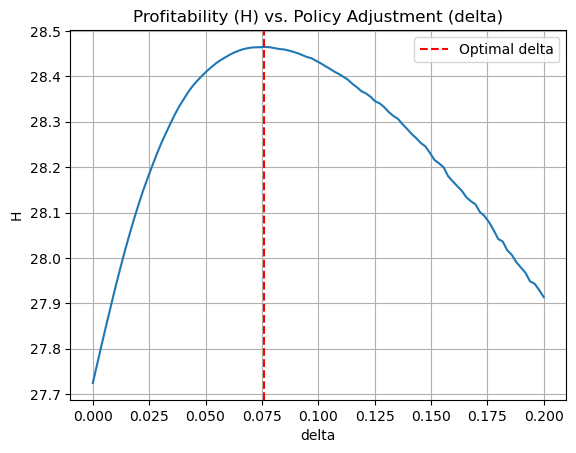

Optimal Delta: 0.0759661474756462
Maximum H: 28.465199498579363


In [12]:
# We choose the number of shock series
K = 1000

# We set the range of delta values
delta_values = np.linspace(0.0, 0.2, 100)

# And set the seed for NumPy random number generator
np.random.seed(2023)

# We initialize H values
H_values = []

# Now we generate future estimated shock series
epsilon_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K-1, T))

# Defining the objective function to maximize H
def objective(delta):
    H_sum = 0
    labor_prev = 0
    kappa_t_prev = 1  # Initial demand shock

    for k in range(K-1):
        h_sum = 0

        for t in range(T):
            kappa_t = math.exp(rho * math.log(kappa_t_prev) + epsilon_series[k, t])
            labor_t = ((1 - eta) * kappa_t / w)**(1 / eta)
            labor_t_policy = (kappa_t * (1 - eta) / w)**(1 / eta)

            if abs(labor_prev - labor_t_policy) > delta:
                labor_t = labor_t_policy
            else:
                labor_t = labor_prev

            h_t = R**(-t) * (kappa_t * labor_t**(1 - eta) - w * labor_t - int(labor_t != labor_prev) * administration_cost)

            h_sum += h_t

            labor_prev = labor_t
            kappa_t_prev = kappa_t

        H_sum += h_sum

    H = H_sum / K

    return -H  # We minimize the negative of H to maximize H

# Finding the optimal delta that maximizes H
res = minimize_scalar(objective, bounds=(0, 0.2), method='bounded')
optimal_delta = res.x
max_H = -res.fun

# We store the H values for all delta values
for delta in delta_values:
    H_values.append(-objective(delta))

# Plotting delta versus H
plt.plot(delta_values, H_values)
plt.axvline(x=optimal_delta, color='r', linestyle='--', label='Optimal delta')
plt.xlabel('delta')
plt.ylabel('H')
plt.title('Profitability (H) vs. Policy Adjustment (delta)')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal Delta:", optimal_delta)
print("Maximum H:", max_H)

From the plot it is evident that in order to maximize the value of the salon delta should be 0.076. This will ensure that there will be no change in the labor unless the change is greater than 0.076. This only further enhances the value of the salon if they do choose to implement this labor policy. The total value of the salon will now become 28.47


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In this modified policy, the salon is trying to expect future business cycles and anticipate their wanted labor level, proactive hiring/firing. Instead of choosing ex post they will now try to choose ex ante. This is with them knowing that cycles are somewhat persistent. The suggested policy introduce a proactive hiring strategy by comparing the current labor level to the previous labor level. If the current labor level is higher than the previous labor level, then we further increase the labor level by a fixed delta (0.05 in this case) to capture potential future demand growth.

In [13]:
# Set parameter values
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = math.pow(1 + 0.01, 1/12)
T = 120
w = 1.0
eta = 0.5
delta = 0.05

# Choose the number of shock series
K = 1000

# We chose a specific seed value. This gives us the opportunity to reproduce our of our results. 
seed_value = 2023

# Set the seed for NumPy random number generator
np.random.seed(seed_value)

# Generate the shock series
epsilon_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K-1, T))

# Define the objective function to maximize H
def objective():
    H_sum = 0
    labor_prev = 0
    kappa_t_prev = 1  # Initial demand shock

    for k in range(K-1):
        h_sum = 0

        for t in range(T):
            kappa_t = math.exp(rho * math.log(kappa_t_prev) + epsilon_series[k, t])
            labor_t = ((1 - eta) * kappa_t / w)**(1 / eta)

            if labor_t > labor_prev:
                labor_t = labor_prev + delta

            h_t = R**(-t) * (kappa_t * labor_t**(1 - eta) - w * labor_t - int(labor_t != labor_prev) * iota)

            h_sum += h_t

            labor_prev = labor_t
            kappa_t_prev = kappa_t

        H_sum += h_sum

    H = H_sum / K

    return -H  # Minimize the negative of H to maximize H

# Find the optimal H for the suggested policy
optimal_H = -objective()

print("Estimated value of H with the suggested policy:", optimal_H)

Estimated value of H with the suggested policy: 27.631937384839286


The policy implementation is somewhat unsuccessful as the value of the salon decreases. The value is a tiny bit smaller than simply following the original policy without a threshold (delta) for when to adjust labor level. We would therefore not guide them to try and foresee the future level. We cannot find any solution that would further increase the value of the salon

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [14]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

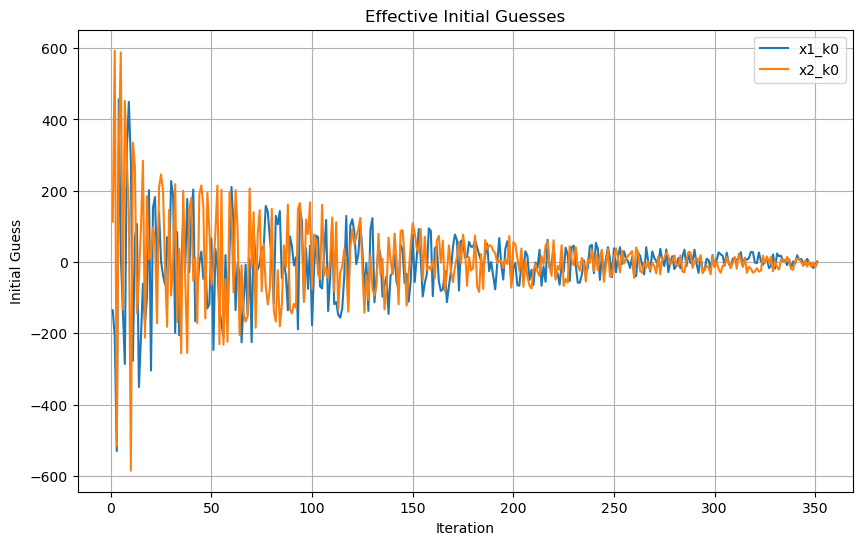

In [15]:
# Defining the parameters
bounds = [-600, 600]
tolerance = 1e-8
warmup_iterations = 10
max_iterations = 1000

# Now we perform the optimization routine
def refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations):
    best_x = None
    best_f = np.inf
    x_k0_storage = []  

    for k in range(max_iterations):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)

        if k < warmup_iterations:
            x_k0 = x_k
        else:
            chi_k = 0.50 * 2 / (1 + np.exp((k - warmup_iterations) / 100))
            x_k0 = chi_k * x_k + (1 - chi_k) * best_x

        result = minimize(griewank, x_k0, method='BFGS', tol=tolerance)
        x_k_star = result.x
        f_k_star = result.fun

        if k == 0 or f_k_star < best_f:
            best_x = x_k_star
            best_f = f_k_star

        x_k0_storage.append(x_k0)

        if best_f < tolerance:
            break

    x_k0_storage = np.array(x_k0_storage)

    # Plotting the initial guesses
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(x_k0_storage) + 1), x_k0_storage[:, 0], label='x1_k0')
    plt.plot(range(1, len(x_k0_storage) + 1), x_k0_storage[:, 1], label='x2_k0')
    plt.xlabel('Iteration')
    plt.ylabel('Initial Guess')
    plt.title('Effective Initial Guesses')
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_x

# Run the optimizer
best_solution = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)


For the warm-up iterations, $\chi_k$ is not used, hence $x_{k0}$ is simply a random guess within the bounds, resulting in a high variability.

Once the warm-up phase ends, in this case after 10 iterations, the $\chi_k$ term starts playing a role. It gradually increases from 0 to almost 1 as $K$ grows. This means the initial guesses $x_{k0}$ gradually transition from being just random guesses to being heavily influenced by the best solution found so far $x^{\ast}$. Thus, the new guesses become less volatile as $K$ increases and start clustering around the previous best solution.

It is worth noting, that the optimization process has a random component due to the uniform random initial guesses, so the output vary between runs. This also impact the result of the next question.

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

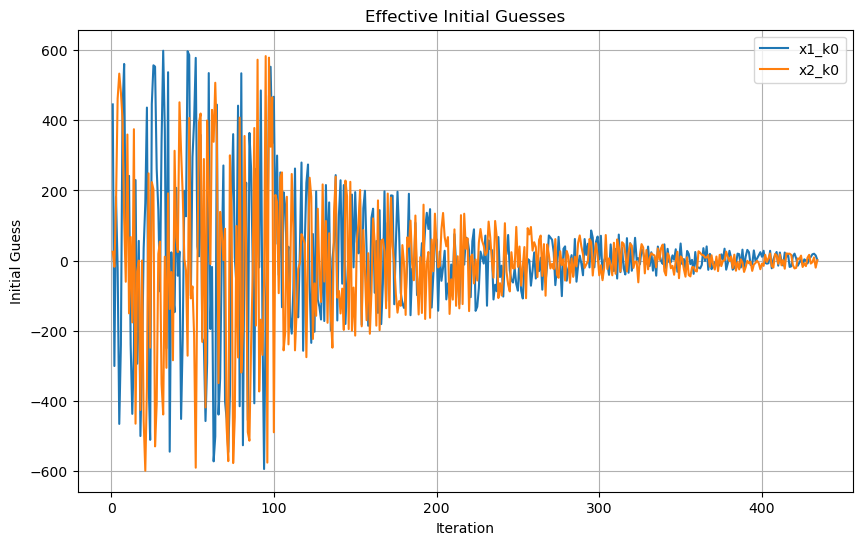

In [16]:
# Defining the parameters with $\underline{K} = 100$
bounds = [-600, 600]
tolerance = 1e-8
warmup_iterations = 100
max_iterations = 1000

def refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations):
    best_x = None
    best_f = np.inf
    x_k0_storage = []  

    for k in range(max_iterations):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)

        if k < warmup_iterations:
            x_k0 = x_k
        else:
            chi_k = 0.50 * 2 / (1 + np.exp((k - warmup_iterations) / 100))
            x_k0 = chi_k * x_k + (1 - chi_k) * best_x

        result = minimize(griewank, x_k0, method='BFGS', tol=tolerance)
        x_k_star = result.x
        f_k_star = result.fun

        if k == 0 or f_k_star < best_f:
            best_x = x_k_star
            best_f = f_k_star

        x_k0_storage.append(x_k0)

        if best_f < tolerance:
            break

    x_k0_storage = np.array(x_k0_storage)

    # Plotting the initial guesses
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(x_k0_storage) + 1), x_k0_storage[:, 0], label='x1_k0')
    plt.plot(range(1, len(x_k0_storage) + 1), x_k0_storage[:, 1], label='x2_k0')
    plt.xlabel('Iteration')
    plt.ylabel('Initial Guess')
    plt.title('Effective Initial Guesses')
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_x

# Running the optimizer
best_solution = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)

When setting $\underline{K} = 100$ it can both results in a slower and a faster convergence below the tolerance level of $\tau$, which suggests that that adding explorations can both help this algorithm avoid local minima and thus converge more quickly to the global minimum but this is dependend on how 'well' the warm-up fase goes.

In this we mean, that the value of $\underline{K}$ in the given algorithm represents the number of 'warm-up' iterations where the algorithm purely explores the space using completely random initial guesses. After this phase, the algorithm starts using a mix of exploitation, using the best-found solution so far, and exploration, using random initial guesses. So the best-found solution changes every time due to the uniform random initial guesses, thus affecting the convergence timing.

Choosing a larger $\underline{K}$ will mean that the algorithm spends more time in the exploration phase before it starts to bias its search towards the best solution found so far. This can in some instances be beneficial. However, a larger $\underline{K}$ also means that the algorithm will take longer to start using the best-found solution to guide its search.